In [1]:
import sqlalchemy as sq
import geopandas as gpd
from dotenv import load_dotenv
import os, sys

sys.path.append('../')
from DataService import DataService

e:\Programming\CGC_Grain_Outcome_Predictions\env\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\danew\AppData\Local\Temp\ipykernel_19716\1253699756.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be s

In [2]:
load_dotenv()
PG_DB = os.getenv('POSTGRES_DB')
PG_ADDR = os.getenv('POSTGRES_ADDR')
PG_PORT = os.getenv('POSTGRES_PORT')
PG_USER = os.getenv('POSTGRES_USER')
PG_PW = os.getenv('POSTGRES_PW')

In [5]:
db = DataService(PG_DB, PG_ADDR, PG_PORT, PG_USER, PG_PW)
conn = db.connect()

In [6]:
query = sq.text('select cr_num, geometry FROM public.census_ag_regions')
agRegions = gpd.GeoDataFrame.from_postgis(query, conn, crs='EPSG:3347', geom_col='geometry')

In [36]:
query = sq.text('select * FROM soil_map')
soilRegions = gpd.GeoDataFrame.from_postgis(query, conn, crs='EPSG:3347', geom_col='geometry')

In [47]:
soil = gpd.sjoin(soilRegions, agRegions, how='left', predicate='intersects')    # Join the two dataframes based on which points fit within what agriculture regions
soil = soil[soil['cr_num'].notna()]                               # Take rows that are valid numbers
soil.reset_index()

soil.drop(columns=['index_right'], inplace=True)

<Axes: >

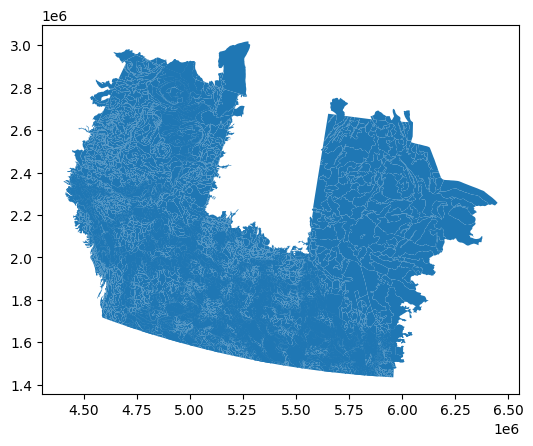

In [48]:
soil.plot()

In [55]:
soil

,AREA,PERIMETER,POLY_ID,ECO_ID,geometry,cr_num,soilTypes
2577,4.536434,10.945768,263001,263,"POLYGON ((5276095.437 3018298.033, 5276400.145...",10.0,None
2866,1.026288,5.288280,276001,276,"POLYGON ((5678072.823 2748852.330, 5678178.336...",0.0,None
2870,1.056852,6.697115,243001,243,"POLYGON ((5027600.897 2916521.211, 5026964.939...",10.0,None
2870,1.056852,6.697115,243001,243,"POLYGON ((5027600.897 2916521.211, 5026964.939...",10.0,None
2875,0.191219,2.948261,243002,243,"POLYGON ((5027600.897 2916521.211, 5027603.497...",10.0,None
...,...,...,...,...,...,...,...
9962,0.008209,0.497322,765007,765,"POLYGON ((5568273.167 1478895.429, 5568241.075...",3.0,None
9966,0.010612,0.758951,832021,832,"POLYGON ((5225545.675 1532075.344, 5225655.965...",4.0,None
9976,0.044383,1.821603,836001,836,"POLYGON ((4809317.164 1649039.426, 4809593.573...",8.0,None
9976,0.044383,1.821603,836001,836,"POLYGON ((4809317.164 1649039.426, 4809593.573...",8.0,None


In [54]:
uniqueCombinations = set()
soil["soilTypes"] = None

for index, row in soil.iterrows():
    print(row["POLY_ID"])
    query = sq.text(f'select "SOIL_CODE" FROM public.soil_cmp WHERE "POLY_ID" = {int(row["POLY_ID"])}')
    results = db.execute(query)
    sys.exit()
    uniqueCombinations.add(results)
    soil.at[index,'soilTypes'] = results
    

263001


InternalError: (psycopg2.errors.InFailedSqlTransaction) current transaction is aborted, commands ignored until end of transaction block

[SQL: select "SOIL_CODE" FROM public.soil_cmp WHERE "POLY_ID" = 263001]
(Background on this error at: https://sqlalche.me/e/20/2j85)

In [ ]:
# create an index for which polygons - and their multiple components have the same attributes
# give each of these indexs a unique color
# plot said color

In [ ]:
db.cleanup()